In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
infusiondrug=pd.read_csv("data/infusiondrug.csv.gz")
intakeOutput=pd.read_csv("data/intakeOutput.csv.gz")
lab=pd.read_csv("data/lab.csv.gz")
medication=pd.read_csv("data/medication.csv.gz",low_memory=False)
microLab=pd.read_csv("data/microLab.csv.gz")
note=pd.read_csv("data/note.csv.gz")
nurseAssessment=pd.read_csv("data/nurseAssessment.csv.gz")
nurseCare=pd.read_csv("data/nurseCare.csv.gz")
nurseCharting=pd.read_csv("data/nurseCharting.csv.gz")
pastHistory=pd.read_csv("data/pastHistory.csv.gz")
patient=pd.read_csv("data/patient.csv.gz")
physicalExam=pd.read_csv("data/physicalExam.csv.gz")
respiratoryCare=pd.read_csv("data/respiratoryCare.csv.gz")
respiratoryCharting=pd.read_csv("data/respiratoryCharting.csv.gz")
treatment=pd.read_csv("data/treatment.csv.gz")
vitalAperiodic=pd.read_csv("data/vitalAperiodic.csv.gz")
vitalPeriodic=pd.read_csv("data/vitalPeriodic.csv.gz")

## Infusion drug
**infusionDrug.**  Details of drug infusions are recorded within the infusionDrug table. These infusions are
entered by care staff manually or interfaced from an electronic health record system from the hospital.
Continuous infusions documented include vasopressors, antibiotics, anticoagulation, insulin, sedatives,
analgesics, and so on. Of the 208 hospitals in eICU-CRD, 152 (73%) have data recorded in the
infusionDrug table. Recorded information includes the name of the drug, a standardized code for the drug
(using Hierarchical Ingredient Code List or HICL codes), the amount of drug in the carrying solution, the
total volume of the carrier, the rate of the drug infusion, and the patient weight (if applicable for dosing).
All records are stored with a single offset representing the time of the infusion.

In [3]:
infusiondrug

,infusiondrugid,patientunitstayid,infusionoffset,drugname,drugrate,infusionrate,drugamount,volumeoffluid,patientweight
0,40215081,1461035,768,Volume (mL) Magnesium (ml/hr),25,NaN,NaN,NaN,NaN
1,38752780,1461035,648,Volume (mL) Magnesium (ml/hr),25,NaN,NaN,NaN,NaN
2,36960718,1461035,-1812,Volume (mL) Magnesium (ml/hr),25,NaN,NaN,NaN,NaN
3,38679313,1461035,-611,Volume (mL) Magnesium (ml/hr),25.42,NaN,NaN,NaN,NaN
4,40681648,1461035,828,Volume (mL) Magnesium (ml/hr),25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
38251,42808150,1827129,15,IVF (ml/hr),75,75.0,NaN,NaN,NaN
38252,44183396,1827129,2069,IVF (ml/hr),50,50.0,NaN,NaN,NaN
38253,42738145,1827129,1534,IVF (ml/hr),50,50.0,NaN,NaN,NaN
38254,42128446,1827129,5904,Epidural (ml/hr),14,14.0,NaN,NaN,NaN


In [9]:
print(infusiondrug['drugname'].unique())
print(len(infusiondrug['drugname'].unique()))

['Volume (mL) Magnesium  (ml/hr)' 'Amiodarone (mg/min)' 'MIV (ml/hr)'
 'Octreotide (ml/hr)' 'Nitroglycerin (mcg/min)' 'Nicardipine (mg/hr)'
 'Labetalol (ml/hr)' 'Norepinephrine (mcg/min)' 'Phenylephrine (mcg/min)'
 'Phenylephrine (mcg/kg/min)' 'Dexmedetomidine (mcg/kg/hr)'
 'Nitroprusside (mcg/kg/min)' 'Fentanyl (mcg/hr)' 'Propofol (mcg/kg/min)'
 'Midazolam (mg/hr)' 'Vasopressin (units/min)' 'Insulin (units/hr)'
 'Milrinone (mcg/kg/min)' 'Dobutamine (mcg/kg/min)'
 'Dopamine (mcg/kg/min)' 'Diltiazem (mg/hr)' 'Diltiazem (ml/hr)'
 'IVF (ml/hr)' 'Abciximab (mcg/min)' 'Dopamine ()' 'Pantoprazole ()'
 'Propofol ()' 'Nicardipine (ml/hr)' 'Furosemide (mg/hr)'
 'Heparin (units/hr)' 'Dexmedetomidine' 'Fentanyl (ml/hr)'
 'Propofol (ml/hr)' 'Amiodarone (ml/hr)' 'Dexmedetomidine (ml/hr)'
 'Heparin (ml/hr)' 'Nitroprusside (ml/hr)' 'Pantoprazole (ml/hr)'
 'Norepinephrine (ml/hr)' 'Phenylephrine (ml/hr)' 'Midazolam (ml/hr)'
 'ivf (ml/hr)' 'Vasopressin (ml/hr)' 'Fentanyl ()' 'Phenylephrine ()'
 'Insuli

## Intake Output
**intakeOutput.**  The intake and output of any volume for patients is stored in the **intakeOutput** table.
Unlike the infusionDrug table, the aim of this table is to tabulate volume received, and thus many records exist with non-specific names such as ''Crystalloids (ml)|Continuous infusion meds''. Overall fluid balance
is an important aspect of patient health, and running totals for intake, output, dialysis, and net (intake
minus output)are recorded. The most frequent records in the intakeOutput table include urine output,
infusion of normal saline, oral fluid intake, non-saline fluid administration (e.g. dextrose based), enteral
feeding, parenteral feeding, and more.

In [10]:
intakeOutput

,intakeoutputid,patientunitstayid,intakeoutputoffset,intaketotal,outputtotal,dialysistotal,nettotal,intakeoutputentryoffset,cellpath,celllabel,cellvaluenumeric,cellvaluetext
0,9314532,147307,-394,0.00,0.0,0.0,0.00,-394,flowsheet|Flowsheet Cell Labels|I&O|Weight|Bod...,Bodyweight (lb),159.80,159.80
1,9314533,147307,-394,0.00,0.0,0.0,0.00,-394,flowsheet|Flowsheet Cell Labels|I&O|Weight|Bod...,Bodyweight (kg),72.50,72.50
2,9319306,211715,1533,120.00,0.0,0.0,120.00,1533,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,P.O.,120.00,120.00
3,9319891,219981,6504,120.00,0.0,0.0,120.00,6504,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,P.O.,120.00,120.00
4,9319987,158057,624,0.00,0.0,0.0,0.00,624,flowsheet|Flowsheet Cell Labels|I&O|Weight|Bod...,Bodyweight (lb),359.00,359.00
...,...,...,...,...,...,...,...,...,...,...,...,...
100461,219411150,3348409,1930,68.75,0.0,0.0,68.75,1930,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,Crystalloids,68.75,68.75
100462,219411264,3329305,1366,150.00,150.0,0.0,0.00,1366,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,Crystalloids,150.00,150.00
100463,219413911,3346866,2980,480.00,350.0,0.0,130.00,2980,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,P.O.,480.00,480.00
100464,219413912,3346866,2980,480.00,350.0,0.0,130.00,2980,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,350.00,350.00


## Lab
**lab.**  Laboratory values collected during routine care are interfaced with eCareManager and archived in
the database. Each row of the lab table contains a single laboratory measurement for a patient. Each
hospital has had their local laboratory measurements mapped to standard concepts. A total of 158
distinct types of laboratory measurements are captured and represented by 158 unique labName values
(including ''magnesium'', ''pH'', ''BUN'', etc). Measurements are stored with the unit of measurement, the
time the lab was drawn, and the last time the value was revised.

In [11]:
lab

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,437880563,1754323,-647,3,Hct,38.30,38.3,%,%,-631
1,437880572,1754323,-647,3,platelets x 1000,181.00,181,K/mcL,k/mm cu,-631
2,437880560,1754323,-647,3,RBC,4.86,4.86,M/mcL,m/mm cu,-631
3,437880570,1754323,-647,3,-monos,8.70,8.7,%,%,-631
4,437880571,1754323,-647,3,MCHC,30.40,30.4,g/dL,%,-631
...,...,...,...,...,...,...,...,...,...,...
434655,672795149,2754778,2041,4,bedside glucose,91.00,91,mg/dL,mg/dL,2041
434656,641165125,2754778,37,1,troponin - I,5.92,5.920,ng/mL,ng/mL,37
434657,667153606,2754778,37,3,MCV,92.00,92,fL,fL,37
434658,673870691,2754778,236,4,bedside glucose,119.00,119,mg/dL,mg/dL,236


In [13]:
print(lab['labname'].unique())
print(len(lab['labname'].unique()))
print(len(lab['labtypeid'].unique()))

['Hct' 'platelets x 1000' 'RBC' '-monos' 'MCHC' 'WBC x 1000' 'Hgb' 'MPV'
 'RDW' 'chloride' 'glucose' 'potassium' 'calcium' '-eos' 'BUN' '-lymphs'
 'MCH' 'creatinine' 'anion gap' 'sodium' 'Total CO2' '24 h urine protein'
 'MCV' "WBC's in urine" '-basos' 'urinary specific gravity'
 'bedside glucose' 'FiO2' 'Temperature' '-bands' '-polys' 'AST (SGOT)'
 'magnesium' 'bicarbonate' 'total bilirubin' 'alkaline phos.' 'paCO2'
 'paO2' 'HCO3' 'O2 Sat (%)' 'troponin - I' 'Base Excess' 'ALT (SGPT)'
 'albumin' 'pH' 'total protein' 'phosphate' 'direct bilirubin' 'PT'
 'PT - INR' 'PTT' 'lactate' 'fibrinogen' 'Vancomycin - trough'
 'Base Deficit' 'Carboxyhemoglobin' 'Methemoglobin' 'O2 Content'
 'CPK-MB INDEX' 'CPK' 'LPM O2' 'CPK-MB' 'HDL' 'LDL' 'total cholesterol'
 'triglycerides' 'PTT ratio' 'TSH' 'ammonia' 'amylase' 'lipase' 'TV'
 'PEEP' 'Respiratory Rate' 'urinary creatinine' 'Pressure Support'
 'urinary sodium' 'folate' 'T4' 'Vitamin B12' 'Fe' 'TIBC'
 'ionized calcium' 'ethanol' 'Ferritin' 'T3RU' 

## Medication
**medication.**  Active medication orders for patients are stored in the medication table. When a
medication order is made by a physician, a pharmacist will review and verify the order in their
corresponding pharmacy system. This order verification is interfaced into eCareManager and stored in
the medication table. Free text instructions and comments are removed during the deidentification
process. In eICU-CRD, two tables focus on recording patient medication: medication and infusionDrug.
There are two key differences between these tables: (1) only continuous infusions are present in
infusionDrug (e.g. intravenously infused normal saline but not orally prescribed acetaminophen), and (2)
**compounds described in medication are orders; and while usually these orders are fulfilled and
administered this cannot be guaranteed.** Information available for each order includes: the start time, end
time, name of the compound, HICL code, dosage, route of administration, frequency of administration,
loading dose, whether the drug is given pro re nata (PRN), and whether the drug is an IV admixture.

In [14]:
medication

,medicationid,patientunitstayid,drugorderoffset,drugstartoffset,drugivadmixture,drugordercancelled,drugname,drughiclseqno,dosage,routeadmin,frequency,loadingdose,prn,drugstopoffset,gtc
0,7278819,141765,134,1396,No,No,WARFARIN SODIUM 5 MG PO TABS,2812.0,5 3,PO,NaN,NaN,No,2739,0
1,9726266,141765,1,-188,No,No,5 ML VIAL : DILTIAZEM HCL 25 MG/5ML IV SOLN,182.0,15 3,IV,Once PRN,NaN,Yes,171,38
2,10293599,141765,115,856,No,No,ASPIRIN EC 81 MG PO TBEC,1820.0,81 3,PO,Daily,NaN,No,2739,0
3,10871534,141765,114,316,No,No,DILTIAZEM HCL 30 MG PO TABS,182.0,30 3,PO,Q6H SCH,NaN,No,2739,0
4,10128716,141765,115,856,No,No,LISINOPRIL 5 MG PO TABS,132.0,5 3,PO,Daily,NaN,No,2428,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,111132207,3353113,3367,3789,No,Yes,NaN,6249.0,1 EACH,TRANSDERM,DAILY,NaN,No,0,97
75600,110685655,3353113,2,-55,No,No,NaN,20971.0,100 ML,INTRAVEN,DRIP,NaN,No,2721,83
75601,111577308,3353113,2,-2258,No,Yes,LORAZEPAM,4846.0,2-4 MG,INTRAVEN,NaN,NaN,Yes,0,83
75602,111587143,3353113,2,-86,No,Yes,NaN,23379.0,20 MG,INTRAMUSC,Q4HRSPRN,NaN,Yes,-65,80


In [15]:
print(medication['drugname'].unique())
print(len(medication['drugname'].unique()))

['WARFARIN SODIUM 5 MG PO TABS'
 '5 ML VIAL : DILTIAZEM HCL 25 MG/5ML IV SOLN' 'ASPIRIN EC 81 MG PO TBEC'
 ... 'INSULIN HUM-REG (PER UNIT)' 'DEXTROSE 50% SYRINGE'
 'OXYCODONE/APAP 5MG/325MG']
1402


## microLab
**microLab.**  Microbiology information from patient derived specimens is made available in the microLab
table. Presence of bacteria in specimens such as blood or sputum provides useful information for
treatment planning and selection of antibiotic regimen. For each record the time of specimen collection
(e.g. blood draw), site of the culture, **organism** found (if any), and sensitivity to various antibiotics (if any
are tested). As microbiology is documented manually by care providers, and not directly interfaced from
local hospital information systems, the table is not populated for a significant number of hospitals.

In [17]:
microLab

,microlabid,patientunitstayid,culturetakenoffset,culturesite,organism,antibiotic,sensitivitylevel
0,840759,2597777,1343,"Sputum, Expectorated",mixed flora,NaN,NaN
1,840628,2597777,2723,"Sputum, Expectorated",mixed flora,NaN,NaN
2,833113,2608936,1,Bronchial Lavage,mixed flora,NaN,NaN
3,839342,2621338,22,"Sputum, Expectorated",gram negative rods,NaN,NaN
4,839341,2621338,22,"Sputum, Expectorated",gram positive cocci,NaN,NaN
...,...,...,...,...,...,...,...
337,1605145,3159826,425,Skin,Pseudomonas aeruginosa,piperacillin/tazobactam,Sensitive
338,1605144,3159826,425,Skin,Pseudomonas aeruginosa,levofloxacin,Intermediate
339,1590725,3160468,-293,"Blood, Venipuncture",no growth,NaN,NaN
340,1590727,3160468,7,Nasopharynx,no growth,NaN,NaN


In [26]:
microLab['organism'].value_counts()

no growth                          112
Other                               75
Staphylococcus aureus               41
Pseudomonas aeruginosa              33
Escherichia coli                    22
gram negative rods                  13
yeast                                9
gram positive cocci                  8
mixed flora                          7
Klebsiella pneumoniae                7
Acinetobacter baumanii               6
Candida albicans                     4
gram positive rods                   2
Clostridium difficile                1
Streptococcus pneumoniae             1
gram positive cocci - in chains      1
Name: organism, dtype: int64

## note
**note.**  Notes are generally entered by the physician or physician extender primarily responsible for the
documentation of the patient's unit care. There are several types of notes which can be entered in the
system including admission, progress, patient medical history, procedure, catheterization, and
consultation. Free-text notes were removed during the deidentification process. Highly structured text
notes which are selected from drop down menus are retained within the database and present in the
note table.

In [27]:
note

,noteid,patientunitstayid,noteoffset,noteenteredoffset,notetype,notepath,notevalue,notetext
0,3594780,157427,1,8,Comprehensive Progress,notes/Progress Notes/Admission Page One/Skip S...,Include Past Medical History,Include Past Medical History
1,3594785,157427,1,8,Comprehensive Progress,notes/Progress Notes/Assessment and Plan/View ...,System View,SystemView
2,3594786,157427,1,8,Comprehensive Progress,notes/Progress Notes/Assessment and Plan/Inclu...,Include Rx,Include Rx
3,3594787,157427,1,8,Comprehensive Progress,notes/Shared/View and Save/Save Options/Print/...,Copies,1
4,3595514,238463,19,22,Comprehensive Progress,notes/Progress Notes/Assessment and Plan/View ...,System View,SystemView
...,...,...,...,...,...,...,...,...
24753,92018040,3329305,19,28,Admission,notes/Progress Notes/Assessment and Plan/View ...,System View,SystemView
24754,92018041,3329305,19,28,Admission,notes/Progress Notes/Assessment and Plan/Inclu...,Include Rx,Include Rx
24755,92018042,3329305,19,28,Admission,notes/Shared/View and Save/Save Options/Print/...,Copies,1
24756,92021621,3335354,460,461,Brief Progress,notes/Progress Notes/Interventions/Intermediat...,Medication change / dose adjustment,Medication change / dose adjustment


## Nurse Assessment
**nurseAssessment.**  The nursing assessment table stores information about the capability to assess and
document patient items such as pain, psychosocial status, patient/family education, and organ specific
statuses. Each record in the table is stored with the time of documentation and the time at which the
assessment is relevant.

In [28]:
nurseAssessment

,nurseassessid,patientunitstayid,nurseassessoffset,nurseassessentryoffset,cellattributepath,celllabel,cellattribute,cellattributevalue
0,57436984,1054428,13791,13819,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Edema,Edema,generalized
1,57483728,1036759,4075,4076,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Secretions,Secretions,minimal
2,57483729,1036759,4075,4076,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Secretions,Secretions,thin
3,57483730,1036759,4075,4076,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Secretions,Secretions,clear
4,57505995,1054428,18051,18065,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Pacemaker/AICD,Pacemaker/AICD,NaN
...,...,...,...,...,...,...,...,...
91584,581670286,3134824,568,707,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Pulses,Right Dorsalis Pedis,faint
91585,581670287,3134824,568,707,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Pulses,Right Radial,faint
91586,581670288,3134824,568,707,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Pulses,Left Posterior Tibial,faint
91587,581670289,3134824,568,707,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Pulses,Left Radial,faint


In [29]:
nurseAssessment['celllabel'].value_counts()

Intervention           15841
Braden Scale           10446
Neurologic             10238
Morse Fall Risk         8795
Breath Sounds           7253
Pupils                  6840
Pulses                  5721
Motor Strength          4398
Pattern                 3008
Edema                   2537
Cough                   2446
Secretions              2421
Auscultation            2286
Reflexes                2119
Skin Color/Temp         1942
Capillary Refill        1708
Pacemaker/AICD          1449
Sensation               1217
Psychosocial Status      922
Train of Four              2
Name: celllabel, dtype: int64

## Nurse Care
**nurseCare.**  Patient care information is documented in the nurseCare table for the following categories:
nutrition, activity, hygiene, wound care, line care, drain status, patient safety, alarms, isolation
precautions, equipment, restraints, and other nursing care data. Each record is stored with an entry time
(nurseCareEntryOffset) and a relevant time (nurseCareOffset). A custom hierarchy is used to
group and store data.

In [30]:
nurseCare

,nursecareid,patientunitstayid,celllabel,nursecareoffset,nursecareentryoffset,cellattributepath,cellattribute,cellattributevalue
0,20977673,1014000,Hygiene/ADLs,2151,2138,flowsheet|Flowsheet Cell Labels|Nursing Care|H...,Hygiene/ADLs,ADLs assist
1,20977674,1014000,Hygiene/ADLs,2151,2138,flowsheet|Flowsheet Cell Labels|Nursing Care|H...,Hygiene/ADLs,oral care
2,21023628,1034813,Equipment,1680,1694,flowsheet|Flowsheet Cell Labels|Nursing Care|E...,Equipment,air mattress
3,21023629,1034813,Equipment,1680,1694,flowsheet|Flowsheet Cell Labels|Nursing Care|E...,Equipment,heels floated
4,21023630,1034813,Equipment,1680,1694,flowsheet|Flowsheet Cell Labels|Nursing Care|E...,Equipment,sling
...,...,...,...,...,...,...,...,...
42075,382497364,3149046,Safety,1285,1416,flowsheet|Flowsheet Cell Labels|Nursing Care|S...,Safety Check,ID band verified
42076,382497365,3149046,Safety,1285,1416,flowsheet|Flowsheet Cell Labels|Nursing Care|S...,Safety Check,allergy band verified
42077,382497366,3149046,Safety,1285,1416,flowsheet|Flowsheet Cell Labels|Nursing Care|S...,Precautions,aspiration
42078,382497367,3149046,Safety,1285,1416,flowsheet|Flowsheet Cell Labels|Nursing Care|S...,Precautions,fall prevention measures


In [31]:
nurseCare['celllabel'].value_counts()

Safety                   17292
Activity                  6937
Hygiene/ADLs              4527
Equipment                 3831
Restraints                3657
Nutrition                 2151
Treatments                2098
Airway Type               1044
Airway Size                318
Isolation Precautions      225
Name: celllabel, dtype: int64

## Nurse Charting
**nurseCharting.**  The majority of bedside documentation is entered into a ''flowsheet'', a tabular style
interface with time in columns (usually hourly)and observations in rows. The nurseCharting table
contains this information using a entity-attribute-value model, where the entity is a patient identifier, the
attribute is the type of data recorded (e.g. heart rate), and the value is the measurement made (e.g. 80
beats per minute). Each charted item is stored with a ''chart time'' (nursingChartOffset), which
specifies when the measurement was relevant, and a ''validation time'' (nursingChartEntryOffset),
which indicates when the measurement was verified by staff. Vital signs available include: heart rate, heart
rhythm, blood pressure, respiratory rate, peripheral oxygen saturation, temperature, location of
temperature measurement, central venous pressure, oxygen flow in liters, oxygen device used for oxygen
flow, and end tidal CO2. Less frequently documented vital signs available include: pulmonary artery
pressure (PA), stroke volume (SV), cardiac output (CO), systemic vascular resistance (SVR), intracranial
pressure (IP), cardiac index (CI), systemic vascular resistance index (SVRI), cerebral perfusion pressure
(CPP), central venous oxygen saturation (SVO2), pulmonary artery occlusion pressure (PAOP),
pulmonary vascular resistance (PVR), pulmonary vascular resistance index (PVRI), and intra-abdominal
pressure (IAP). Other data elements available in nurseCharting include assessments made, commonly
tabulated scores (neurological function scales, sedation scales, pain scales), and other physiologic
measurements or device settings.

In [32]:
nurseCharting

,nursingchartid,patientunitstayid,nursingchartoffset,nursingchartentryoffset,nursingchartcelltypecat,nursingchartcelltypevallabel,nursingchartcelltypevalname,nursingchartvalue
0,189336686,143870,-67,-67,Other Vital Signs and Infusions,"Eye, Ear, Nose, Throat Assessment",Value,WDL
1,187848155,143870,239,239,Other Vital Signs and Infusions,Gastrointestinal Assessment,Value,X
2,281610014,143870,433,433,Other Vital Signs and Infusions,Pain Assessment,Value,WDL
3,237860915,143870,433,433,Other Vital Signs and Infusions,Neurological Assessment,Value,WDL
4,265486190,143870,1108,1108,Vital Signs,Respiratory Rate,Respiratory Rate,15
...,...,...,...,...,...,...,...,...
1477158,108250867,141765,-94,-94,Vital Signs,Non-Invasive BP,Non-Invasive BP Mean,98
1477159,232544946,141765,-190,-190,Vital Signs,O2 Saturation,O2 Saturation,98
1477160,196521578,141765,2086,2086,Vital Signs,O2 Saturation,O2 Saturation,96
1477161,217409072,141765,-154,-154,Vital Signs,Non-Invasive BP,Non-Invasive BP Systolic,164


In [34]:
nurseCharting['nursingchartcelltypecat'].value_counts()

Vital Signs                        1185433
Scores                              162393
Other Vital Signs and Infusions     103833
Vital Signs and Infusions            13086
Invasive                             10662
SVO2                                   980
ECG                                    776
Name: nursingchartcelltypecat, dtype: int64

## Past History
**pastHistory.** Information related a patient's relevant past medical history is stored in the pastHistory
table. Providing a detailed past history is not common, but items such as AIDS, cirrhosis of the liver,
hepatic failure, chronic renal failure, transplant, pre-existing cancers, and immunosuppression are more
reliably documented due to their importance in severity of illness scoring. Elements of past medical
history are documented using a custom hierarchical coding system and stored with the charted time
(pastHistoryOffset) and with the entry time (pastHistoryEntryOffset).

In [35]:
pastHistory

,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
0,990803,141765,7,12,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
1,970059,143870,4,10,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
2,1180401,144815,32,41,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
3,1194998,145427,8,13,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
4,896652,147307,53,56,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
...,...,...,...,...,...,...,...,...
12104,22203642,3353113,2484,2497,Follow-up Consultation/Other,notes/Progress Notes/Past History/Past History...,Performed,Performed
12105,22316117,3353113,949,969,Follow-up Consultation/Other,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
12106,22329261,3353113,77,86,Admission,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
12107,22203643,3353113,2484,2497,Follow-up Consultation/Other,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment


In [36]:
pastHistory["pasthistoryvalue"].value_counts()

Performed                               2998
hypertension requiring treatment        1746
insulin dependent diabetes               457
medication dependent                     397
CHF                                      392
                                        ... 
TIA(s) - within 2 years                    1
testes                                     1
renal insufficiency - creatinine > 5       1
stomach                                    1
angina - class III                         1
Name: pasthistoryvalue, Length: 174, dtype: int64

## Patient

In [37]:
patient

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141764,129391,Female,87,Caucasian,59,91,NaN,157.5,23:36:00,...,ICU to SDU,2,stepdown/other,NaN,NaN,18:58:00,344,Home,Alive,002-1039
1,141765,129391,Female,87,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,...,Emergency Department,1,admit,46.5,45.0,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039
2,143870,131022,Male,76,Caucasian,68,103,"Endarterectomy, carotid",167.0,20:46:00,...,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289
3,144815,131736,Female,34,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,...,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116
4,145427,132209,Male,61,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,...,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,3351763,2741766,Female,62,Caucasian,459,1108,"Fistula/abscess, surgery for (not inflammatory...",165.1,16:08:00,...,Operating Room,1,admit,134.5,133.3,19:24:00,5394,Step-Down Unit (SDU),Alive,035-10391
2516,3352230,2742186,Male,41,African American,458,1107,"CABG alone, coronary artery bypass grafting",177.8,21:21:00,...,Operating Room,2,transfer,127.0,128.5,21:34:00,4261,Telemetry,Alive,035-10089
2517,3352231,2742186,Male,41,African American,458,1104,"Infarction, acute myocardial (MI)",177.8,21:21:00,...,Direct Admit,1,admit,127.0,135.2,22:26:00,1369,Other ICU,Alive,035-10089
2518,3352333,2742269,Male,72,Caucasian,458,1111,GI obstruction,177.8,20:00:00,...,Other Hospital,1,admit,68.3,66.5,17:26:00,4166,Floor,Alive,035-10041


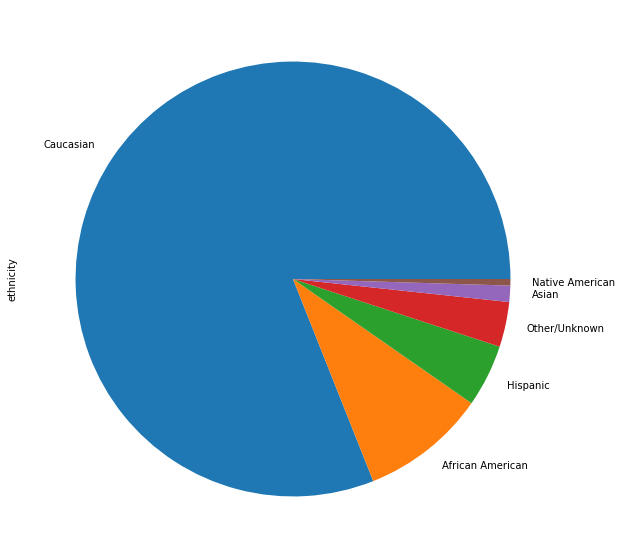

In [50]:
plt.figure(figsize=(10,10))
patient["ethnicity"].value_counts().plot(kind='pie')
plt.show()

## Physical Exam
**physicalExam:** Results of physical exams performed are stored in the physicalExam table. Data for
physical exams are entered directly into eCareManager. The choices for the physical exam include "Not
Performed", "Performed-Free Text", and "Performed-Structured". Free text sections are not included in
the database. There is a large variety of drop-down menus for the physical exams recorded, with specific
text entry boxes allowing for the creation of a structured physical exam.

In [51]:
physicalExam

,physicalexamid,patientunitstayid,physicalexamoffset,physicalexampath,physicalexamvalue,physicalexamtext
0,5276231,157427,1,notes/Progress Notes/Physical Exam/Physical Ex...,scored,scored
1,5276232,157427,1,notes/Progress Notes/Physical Exam/Physical Ex...,Performed - Structured,Performed - Structured
2,5276236,157427,1,notes/Progress Notes/Physical Exam/Physical Ex...,Admission,86.2
3,5276237,157427,1,notes/Progress Notes/Physical Exam/Physical Ex...,Current,86.2
4,5276238,157427,1,notes/Progress Notes/Physical Exam/Physical Ex...,Delta,0
...,...,...,...,...,...,...
84053,161898552,3329305,19,notes/Progress Notes/Physical Exam/Physical Ex...,Dialysis Net,0
84054,161898553,3329305,19,notes/Progress Notes/Physical Exam/Physical Ex...,Total Net,0
84055,161898554,3329305,19,notes/Progress Notes/Physical Exam/Physical Ex...,6,6
84056,161898555,3329305,19,notes/Progress Notes/Physical Exam/Physical Ex...,4,4


## Respiratory Care
**respiratoryCare.** This table contains information related to respiratory care. Patient data include
respiratory care times, sequence of records for historical ordering, airway type/size/position, cuff pressure
and various other ventilation details. Unlike other tables, the respiratoryCare table does not use an entityvalue-
attribute model, but instead has many columns for each setting, most of which are empty for a
given time of data recording.

In [52]:
respiratoryCare

,respcareid,patientunitstayid,respcarestatusoffset,currenthistoryseqnum,airwaytype,airwaysize,airwayposition,cuffpressure,ventstartoffset,ventendoffset,...,peeplimit,cpaplimit,setapneainterval,setapneatv,setapneaippeephigh,setapnearr,setapneapeakflow,setapneainsptime,setapneaie,setapneafio2
0,564013,147784,1188,2,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,564012,147784,-61,1,NaN,NaN,NaN,NaN,-361,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,545261,165840,-63,1,NaN,NaN,NaN,NaN,-363,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,545262,165840,73,2,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,550472,187150,7293,2,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,6498207,3353113,3777,7,No Artificial Airway,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5432,6498202,3353113,204,2,No Artificial Airway,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5433,6498203,3353113,369,3,No Artificial Airway,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5434,6498201,3353113,-1311,1,No Artificial Airway,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Respiratory Charting
**respiratoryCharting.** Charted data which relate to a patient's ventilation status, including the
configuration of the bedside mechanical ventilator, are stored in the respiratoryCharting table. Each
setting is stored with an entry time (respChartEntryOffset) and an observation time
(respChartOffset). Examples of settings include the percentage of oxygen inspired, tidal volumes,
pressure settings, and other ventilator parameters.

In [53]:
respiratoryCharting

,respchartid,patientunitstayid,respchartoffset,respchartentryoffset,respcharttypecat,respchartvaluelabel,respchartvalue
0,107,184757,2922,2922,respFlowSettings,LPM O2,1
1,1108,187150,408,408,respFlowSettings,FiO2,80
2,10629,179269,117,117,respFlowSettings,LPM O2,6
3,13000,162502,3845,3845,respFlowSettings,LPM O2,25
4,13001,162502,3845,3845,respFlowSettings,FiO2,60
...,...,...,...,...,...,...,...
176084,255552672,3344943,562,562,respFlowSettings,PEEP,5
176085,255552673,3344943,562,562,respFlowPtVentData,Peak Insp. Pressure,23
176086,255552674,3344943,562,562,respFlowPtVentData,Mean Airway Pressure,9
176087,255552675,3344943,562,562,respFlowCareData,Adult Con Alarms Hi Press Alarm,50


## Treatment
**treatment.** A custom hierarchical coding system is used to record active treatments, and there are are
2,711 unique treatments documented in eICU-CRD. The most frequent treatments explicitly documented
in the table across patients were mechanical ventilation (16.96% of patients), chest x-rays (8.79% of
patients), oxygen therapy via a nasal cannula with a low fraction of oxygen (6.93% of patients), and
normal saline administration (7.57%).

In [54]:
treatment

,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
0,9579899,242895,838,cardiovascular|arrhythmias|anticoagulant admin...,False
1,8788989,242895,512,cardiovascular|consultations|Cardiology consul...,False
2,10293108,242895,838,cardiovascular|non-operative procedures|extern...,False
3,9017080,242895,70,pulmonary|vascular disorders|VTE prophylaxis|l...,False
4,9853526,242895,70,cardiovascular|consultations|Cardiology consul...,False
...,...,...,...,...,...
38285,82612510,3352230,2176,pulmonary|ventilation and oxygenation|mechanic...,False
38286,82477425,3352230,2176,neurologic|pain / agitation / altered mentatio...,False
38287,82402829,3352231,117,cardiovascular|non-operative procedures|intraa...,False
38288,82335549,3352333,317,gastrointestinal|consultations|Gastroenterolog...,False


## Vital periodic
**vitalPeriodic.** Continuously measured vital signs are recorded in the vitalPeriodic table and include
heart rate, respiratory rate, oxygen saturation, temperature, invasive arterial blood pressure, pulmonary
artery pressure, ST levels, and intracranial pressure (ICP). Vital signs are originally collected at 1-minute
intervals, with 5-minute medians archived in eICU-CRD. Table 7 summarizes data completion for
periodic vital signs. The most frequently available periodic vital sign is heart rate (available for 96% of
patients), and the least available periodic vital sign is ICP (available for 0.81% of patients). Conversely,
while the average number of heart rate measurements among patients with at least one recording of heart
rate is 759.2 (approximately 63 hours), the average number of ICP measurements among patients with at
least one ICP measurement is much higher at 1610.3 (approximately 134 hours). Thus, while monitoring
of ICP is infrequent across all patients, when it is performed it results in a large number of observations.

In [55]:
vitalPeriodic

,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
0,29524122,141765,1179,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29557845,141765,189,NaN,97.0,76.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29524442,141765,1169,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29513052,141765,1534,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29524600,141765,1164,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634955,2170320510,3353113,1846,NaN,98.0,67.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.7,0.2,NaN
1634956,2170329786,3353113,1146,NaN,97.0,65.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.8,0.2,NaN
1634957,2170340151,3353113,366,NaN,98.0,48.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.7,0.2,NaN
1634958,2170320574,3353113,1841,NaN,98.0,67.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.7,0.2,NaN


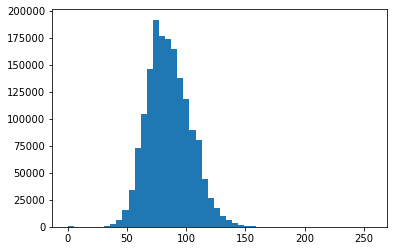

In [60]:
plt.hist(vitalPeriodic['heartrate'],bins=50)
plt.show()

## Vital Aperiodic
**vitalAperiodic.** Aperiodic vital signs are collected at various times and include non-invasive blood
pressure, pulmonary artery occlusion pressure (PAOP), cardiac output, cardiac input, systemic vascular
resistance (SVR), SVR index (SVRi), pulmonary vascular resistance (PVR), and PVR index (PVRi). The
most frequent aperiodic vital sign is blood pressure (available for 94% of patients), and the least frequent
is PVRi (available for 0.93% of patients).

In [61]:
vitalAperiodic

,vitalaperiodicid,patientunitstayid,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
0,3661418,141764,81,171.0,90.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3661424,141764,334,153.0,78.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3661417,141764,77,176.0,87.0,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3661419,141764,165,173.0,106.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3661421,141764,255,182.0,103.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274083,445476282,3353113,2206,146.0,97.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274084,445476261,3353113,1269,121.0,87.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274085,445476252,3353113,710,127.0,89.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274086,445476260,3353113,1257,123.0,82.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


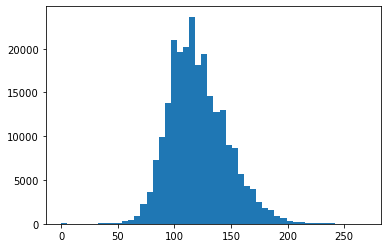

In [64]:
plt.hist(vitalAperiodic['noninvasivesystolic'],bins=50)
plt.show()

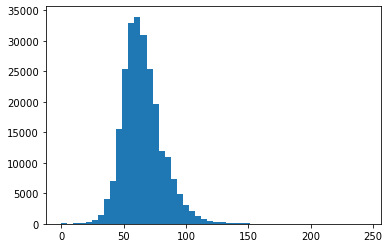

In [65]:
plt.hist(vitalAperiodic['noninvasivediastolic'],bins=50)
plt.show()